## Image Processing - SCC5830
### Assignment 02 - Image Enhancement and Filtering
### Method 1 - Bilateral Filter
Authors: 
- Alexis J. Vargas  (Usp Number: 11939710) 
- Karelia A. Vilca (Usp Number: 11939727)

Semester 1, Year: 2020


In [1]:
import numpy as np
import imageio
import matplotlib.pyplot as plt

### 1. Functions
#### A) General functions
- ##### Image padding
Adds a zeros outline to the image, the number of zeros is the kernel size divided by 2 (floor)

In [2]:
def padding_img(img,padding):
    """Function that returns padded image
    Arguments:
        img -- input image
        padding -- number of zeros = kernel.shape/2
    """    
    new_img = np.zeros((img.shape[0]+padding*2, img.shape[1]+padding*2))
    ni_n, ni_m = new_img.shape
    new_img[padding:ni_n-padding, padding:ni_m-padding] = img
    return ( new_img )

- ##### Root Mean Squared Error
Rounding to 4 decimal places
$$RSE = \sqrt{\sum_{i}\sum_{j}(m(i,j)-r(i,j))^2} $$

In [3]:
def rsr(img1,img2):
    return ( round (np.sqrt(sum(sum((img1 - img2)**2))),4) )

- ##### Euclidean Distance
Gets the distance between 2 points with x and y values, the formula is simplified beacuse for this problem one of the points is always (0,0) 
$$E(x,y) = \sqrt{x^2 + y^2}$$

In [4]:
def E(x, y):
    return np.sqrt(np.power(x,2) + np.power(y,2))

- ##### Gaussian kernel
Centred at the origin
$$G(x,\sigma) = \frac{1}{2\pi\sigma^2}exp(-\frac{x^2}{2\sigma^2}) $$

In [5]:
def G(x,o):
    return (1/(2*np.pi*np.power(o,2)))*np.exp(-1*(np.power(x,2)/(2*np.power(o,2))))

#### B) Method 1 - Bilateral Filter
- ##### Formula
    * $G_{\sigma s}$ is a spatial Gaussian
    * $G_{\sigma r}$ is a range Gaussian
$$BF[I]_p=\frac{1}{W_p}\sum_{q\in S}G_{\sigma s}(||p - q||)G_{\sigma r}(I_p - I_q)I_q$$
- ##### Normalization factor
$$W_p=\sum_{q\in S}G_{\sigma s}(||p - q||)G_{\sigma r}(I_p - I_q)$$

In [6]:
# Make the convolution for one pixel x, y; n: size of the kernel; gs: spatial gaussian kernel
def conv_point(img, n, gs, sigma_r, x, y):
    # a is use to get the range area starting from the pixel and getting the sub image of n x n
    a = int((n-1)/2)
    sub_img = img[ x-a : x+a+1 , y-a:y+a+1 ]
    # calculating the range_kernel, the normalization Factor (Wp) and part of the Bilateral Filter formula
    range_kernel = np.zeros((n,n))
    If = 0
    Wp = 0
    for i in range(n):
        for j in range(n):
            range_kernel[i][j] = G(sub_img[i][j]-img[x][y],sigma_r)
            wi = range_kernel[i][j] * gs[i][j]
            Wp = Wp + wi
            If = If + (wi * sub_img[i,j])
    # Finish the Bilateral Formula dividing the value by the normalization factor
    If = int(If / Wp)
    return If
def M1_bilateral(img,n,sigma_s, sigma_r):
    # Calculate the spatial kernel
    spatial_kernel = np.zeros((n,n))
    for i in range(int(-n/2),int(n/2+1)):
        for j in range(int(-n/2),int(n/2+1)):
            spatial_kernel[i + int(n/2)][j + int(n/2)] = G(E(i,j),sigma_s)
    # Padding the image
    pad = int(np.floor(n/2))
    pad_image = padding_img(img,pad)
    # Make the convolution for all pixels
    result = np.zeros(img.shape)
    for i in range(img.shape[0]):
        for j in range(img.shape[1]):
            result[i][j] = conv_point(pad_image, n, spatial_kernel, sigma_r, i+pad, j+pad)
    return result

### 2. Example - Bilateral Filter
#### A) Consider test case number 1
- camera.png
- 1
- 0
- 3
- 150.0
- 100.0

Error:  3429.3615


(-0.5, 149.5, 149.5, -0.5)

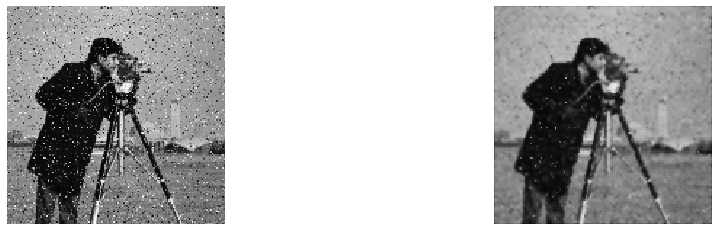

In [7]:
img = imageio.imread('../images/camera.png').astype(np.int32)
n = 3
sigma_s = 150.0
sigma_r = 100.0
output_img = M1_bilateral(img,n,sigma_s,sigma_r)
rsr_output = rsr(img, output_img)
print('Error: ',rsr_output)

plt.figure(figsize=(16,4))
plt.subplot(121)
plt.imshow(img, cmap="gray", vmin=0, vmax=255)
plt.axis('off')
plt.subplot(122)
plt.imshow(output_img, cmap="gray", vmin=0, vmax=255)
plt.axis('off')

The second image shows a smoothed version of the original image with the edges preserved

#### B) Consider test case number 1
- moon.png
- 1
- 0
- 5
- 50.0
- 100.0

Error:  1787.2361


(-0.5, 149.5, 149.5, -0.5)

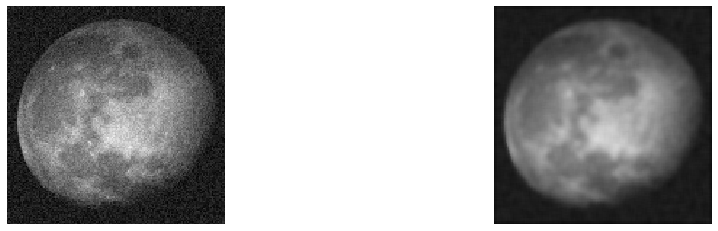

In [8]:
img = imageio.imread('../images/moon.png').astype(np.int32)
n = 5
sigma_s = 50.0
sigma_r = 100.0
output_img = M1_bilateral(img,n,sigma_s,sigma_r)
rsr_output = rsr(img, output_img)
print('Error: ',rsr_output)

plt.figure(figsize=(16,4))
plt.subplot(121)
plt.imshow(img, cmap="gray", vmin=0, vmax=255)
plt.axis('off')
plt.subplot(122)
plt.imshow(output_img, cmap="gray", vmin=0, vmax=255)
plt.axis('off')